In this tutorial, we'll use Python with the Numpy and Theano to get a feel for writing machine learning algorithms. We'll start with a brief intro those libraries, and then implement a logistic regression and a neural network, looking at some properties of the implementations as we train them. To run this code, you must have a computer with Python, [Theano](http://deeplearning.net/software/theano/), [NumPy](http://www.numpy.org/), and [Matplotlib](http://matplotlib.org/) installed, as well as [IPython](http://ipython.org/) if you wish to follow along directly in this notebook, which you can download from [here](http://andrew.gibiansky.com/blog/machine-learning/coding-intro-to-nns/data/Quick-Coding-Intro-to-Neural-Networks.ipynb).

# Intro to Python Libraries

Before jumping into neural networks with Python, we'll need to understand the basics of NumPy and Theano, the two libraries we'll be using for our code.

## NumPy

Let's start by importing the `numpy` module under its common `np` alias:

In [1]:
import numpy as np

Let's start off with **NumPy**. If you've used Matlab before, NumPy should feel fairly familiar. It's a library in Python for dealing with structured matrices.

We can make a NumPy array by feeding a Python list to `np.array`:

In [2]:
np.array([1, 2, 3])

array([1, 2, 3])

We can do two dimensional matrices by giving it lists of lists:

In [3]:
np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

And three dimension matrices by giving it lists of lists of lists:

In [4]:
np.array([[[1, 2, 3], [4, 5, 6], [7, 8, 9]],
          [[1, 2, 3], [4, 5, 6], [7, 8, 9]]])

array([[[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]],

       [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]])

NumPy has its own system for managing what type of data it has, so we can ask it to store our data in whatever format we want:

In [5]:
print 'Float', np.array([1, 2, 3], dtype=np.float)
print 'Double', np.array([1, 2, 3], dtype=np.double)
print 'Unsigned 8-bit int', np.array([1, 2, 3], dtype=np.uint8)

Float [ 1.  2.  3.]
Double [ 1.  2.  3.]
Unsigned 8-bit int [1 2 3]


NumPy provides many ways to create matrices without initializing them explicitly:

In [6]:
print 'Matrix of 1s'
print np.ones((3, 3))

print 'Matrix of 0s'
print np.zeros((3, 3))

# Many ways of generating random values in numpy.random
# Different distributions, etc. Default is uniform([0, 1])
print 'Random matrix'
print np.random.random((3, 3)) 

Matrix of 1s
[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]
Matrix of 0s
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
Random matrix
[[ 0.92513975  0.77399512  0.5564748 ]
 [ 0.17570979  0.49030565  0.04930283]
 [ 0.52494665  0.05839905  0.83307047]]


Note that in each of these cases we had to give NumPy the tuple `(3, 3)`; this is the *shape* of the desired matrix. You can access it with the `shape` attribute:

In [7]:
A = np.random.random((3, 3))
print A.shape

(3, 3)


NumPy lets us access individual elements of the arrays:

In [8]:
A[0, 2] # Zero-indexed!

0.3152374031020847

NumPy lets us do standard mathematical operations on our matrices. Some just use normal symbols, others require a function call:

In [9]:
A = np.random.random((3, 3))
B = np.random.random((3, 3))

# Elementwise addition, subtraction
A + B, A - B

# Elementwise multiplication, division
A * B # NOT matrix multiplication
A / B

# Matrix multiplication
A.dot(B)

# Dot Product
a = np.random.random(3)
b = np.random.random(3)
a.dot(b)

# Matrix inverse
np.linalg.inv(A)

array([[ 2.91015537, -1.16005608, -0.94295183],
       [-0.60738575, -0.01658487,  1.35084085],
       [-1.23966733,  2.2345435 , -0.63121386]])

## Theano

NumPy is a fairly simple library. It lets us represent data in a compact way and do common operations on it, but it doesn't help us reduce the complexity of our programs significantly.

Theano is a Python library built on top of NumPy with the goal of simplifying machine-learning style algorithm design and programming. Unlike NumPy, it uses a *symbolic* representation of the operations you're doing. It is a bit more complex and requires a bit more setup, so let's dig in.

A complete Theano tutorial is available [here](http://deeplearning.net/software/theano/tutorial/).

Start out by importing it:

In [10]:
from theano import *
import theano.tensor as T

Everything in Theano is done with symbolic variables. We create symbolic variables with constructors from the `theano.tensor` package, such as `dmatrix` or `fscalar` or `dtensor`. The first character is `d` or `f`, which stand for "double" or "float" (precision of your data, 64-bit or 32-bit):

In [11]:
x = T.dvector("x")
y = T.dvector("y")
A = T.dmatrix("A")

Note that we give each symbolic variable a name, and that the variable name and the name we give Theano don't have to match up.

We can use NumPy-style operations to operate on these:

In [12]:
z = x + A.dot(y)

However, note that we *haven't* given Theano any data! Theano is building up a symbolic representation of our program in the background. We can ask it to print the expression corresponding to any particular value:

In [13]:
pp(z)

'(x + (A \\dot y))'

To do something with Theano, we have to convert a symbolic expression into a function. For this we have the `function` command:

In [14]:
f = function([x, y, A], z)

The function command (in its simplest form) takes two things: a list of input variables and an output variable. We can now call the function `f` with NumPy arrays as inputs:

In [15]:
x_data = np.random.random(10)
y_data = np.random.random(5)
A_data = np.random.random((10, 5))
f(x_data, y_data, A_data)

array([ 1.58530375,  1.59986284,  2.22358015,  1.85565204,  1.16114351,
        1.7345693 ,  1.98492464,  1.68300919,  1.66263508,  1.39496201])

# Preparing the Data

Before proceeding with NumPy and Theano, let's get ourselves some data to learn from.

We're going to use a database called [MNIST](http://en.wikipedia.org/wiki/MNIST_database), a database of handwritten digits that is commonly used as a benchmark for machine learning algorithms.

First, let's download the dataset with `wget`:

In [16]:
!wget http://deeplearning.net/data/mnist/mnist.pkl.gz

--2015-04-08 12:48:31--  http://deeplearning.net/data/mnist/mnist.pkl.gz
Resolving deeplearning.net... 132.204.26.28
Connecting to deeplearning.net|132.204.26.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16168813 (15M) [application/x-gzip]
Saving to: 'mnist.pkl.gz'

100%[======================================>] 16,168,813  6.45MB/s   in 2.4s   

2015-04-08 12:48:33 (6.45 MB/s) - 'mnist.pkl.gz' saved [16168813/16168813]



Next, let's load it in as a NumPy array:

In [17]:
import cPickle, gzip

# Load the dataset
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = cPickle.load(f)

Note that it's already conveniently divided into a test, validation, and training set. Let's take a look at the shape of our data:

In [18]:
print 'Shapes:'
print '\tTraining:   ', train_set[0].shape, train_set[1].shape
print '\tValidation: ', valid_set[0].shape, valid_set[1].shape
print '\tTest:       ', test_set[0].shape, test_set[1].shape

Shapes:
	Training:    (50000, 784) (50000,)
	Validation:  (10000, 784) (10000,)
	Test:        (10000, 784) (10000,)


We have 50 thousand training images, ten thousand validation images, and ten thousand test images; each set comes with a set of labels as well.

# Logistic Regression

Before immediately jumping in to a neural network, let's start off with just a logistic regression. A logistic regression is, after all, just a neural network with no hidden layers!

This part of the tutorial is taken almost directly from [the Theano documentation](http://deeplearning.net/tutorial/logreg.html).

A logistic regression has a matrix of weights $W$ and a vector of biases $b$; these are what we will be learning. Let's start off by making them:

In [19]:
# Weight vector shape: from 784 pixels to 10 possible classifications
W_shape = (10, 784)
b_shape = 10

W = shared(np.random.random(W_shape) - 0.5, name="W")
b = shared(np.random.random(b_shape) - 0.5, name="b")

We are now using the `shared` constructor function instead of something like `dmatrix` or `fvector`. Using `shared` tells Theano that we plan on reusing this: instead of this being an *input* into our function, this is something that is hidden in the background, and our function can update.

Next, let's make our input matrix (which can be the training, validation, or test set), and our input labels. Both of these are symbolic inputs, so we use `dmatrix` as before:

In [20]:
x = T.dmatrix("x") # N x 784
labels = T.dmatrix("labels") # N x 10

Finally, let's construct our symbolic expression representing the output of our logistic regression. We use the function `theano.tensor.nnet.softmax`, which implements the softmax function $s(\vec x) : \mathbb{R}^N \to \mathbb{R}^N$, where the $j$th component is defined as:

$$s(\vec x)_j = \frac{e^{x_j}}{\sum_{i=1}^N e^{x_i}}$$

In [21]:
output = T.nnet.softmax(x.dot(W.transpose()) + b)

The model predicts whichever class has the highest output on its corresponding unit:

In [22]:
prediction = T.argmax(output, axis=1)

Next, we have to generate an error function so that we have a way to train our model. For logistic regression, we could use the negative log-likelihood. 

In neural networks, the classic way of generating an error model is called **binary cross-entropy**, and since we're treating this regression as just a neural network without a hidden layer, let's go ahead and use it. If our prediction is $\hat y$ and the real value is $y$, then binary cross-entropy is defined as

$$b(y, \hat y) = -y \log(\hat y) - (1 - y)\log(1 - \hat y)$$

Since $y$ is either zero or one, this is really applying a logarithmic penalty to $\hat y$ according to whatever $y$ should be.

When $y$ and $\hat y$ are vectors, then apply binary cross-entropy element-wise and take the mean of the components to get the total cost.

In [23]:
cost = T.nnet.binary_crossentropy(output, labels).mean()

In the above usage of `binary_crossentropy`, we are assuming that `labels` is already in encoded form. That is, instead of being a digit between 0 and 9, each label is a 10-vector filled with zeros, except for one element which is a one; the index at which the one is located is the digit that the label represents. Before proceeding, let's write a label encoder with NumPy:

In [24]:
def encode_labels(labels, max_index):
    """Encode the labels into binary vectors."""
    # Allocate the output labels, all zeros.
    encoded = np.zeros((labels.shape[0], max_index + 1))
    
    # Fill in the ones at the right indices.
    for i in xrange(labels.shape[0]):
        encoded[i, labels[i]] = 1
    return encoded

print 'Example label encoding'
print encode_labels(np.array([1, 3, 2, 0]), 3)

Example label encoding
[[ 0.  1.  0.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  1.  0.]
 [ 1.  0.  0.  0.]]


Finally, we are ready to compile our Theano functions! We're going to make three functions:

- `compute_prediction`: Given an input vector, predict what digit it is.
- `compute_cost`: Given an input vector and labels, compute the current cost.
- `train`: Given an input vector and labels, update the shared weights.

We already know how to do the first two given our knowledge of Theano:

In [25]:
compute_prediction = function([x], prediction)
compute_cost = function([x, labels], cost)

In order to implement `train`, we're going to have to use Theano *update* functionality. In addition to inputs and outputs, Theano's `function` can take a list of updates that we would like to have it perform. Each update is a tuple, where each tuple contains the shared variable we'd like to update and the value we'd like to update it to. In this case, our updates are just our gradients.

This is where Theano starts to *shine*: we don't need to compute the gradients ourselves. Theano comes with a `grad` function, which, given a variable to differentiate and a variable to differentiate with respect to, symbolically computes the gradient we need. So our update step is pretty easy to implement:

In [26]:
# Compute the gradient of our error function
grad_W = grad(cost, W)
grad_b = grad(cost, b)

# Set up the updates we want to do
alpha = 2
updates = [(W, W - alpha * grad_W),
           (b, b - alpha * grad_b)]

# Make our function. Have it return the cost!
train = function([x, labels],
                 cost,
                 updates=updates)

We can now train it on our training set until it seems to converge, using a heuristic adaptive step size:

In [27]:
# Set up the updates we want to do
alpha = T.dscalar("alpha")
updates = [(W, W - alpha * grad_W),
           (b, b - alpha * grad_b)]

# Make our function. Have it return the cost!
train = function([x, labels, alpha],
                 cost,
                 updates=updates)

In [28]:
alpha = 10.0
labeled = encode_labels(train_set[1], 9)

costs = []
while True:
    costs.append(float(train(train_set[0], labeled, alpha)))
    
    if len(costs) % 10 == 0:
        print 'Epoch', len(costs), 'with cost', costs[-1], 'and alpha', alpha
    if len(costs) > 2 and costs[-2] - costs[-1] < 0.0001:
        if alpha < 0.2:
            break
        else:
            alpha = alpha / 1.5

Epoch 10 with cost 0.260901803689 and alpha 6.66666666667
Epoch 20 with cost 0.104591880122 and alpha 6.66666666667
Epoch 30 with cost 0.091522938779 and alpha 6.66666666667
Epoch 40 with cost 0.0840757467672 and alpha 6.66666666667
Epoch 50 with cost 0.0790960577096 and alpha 6.66666666667
Epoch 60 with cost 0.0754298158909 and alpha 6.66666666667
Epoch 70 with cost 0.0725773594667 and alpha 6.66666666667
Epoch 80 with cost 0.0702776754904 and alpha 6.66666666667
Epoch 90 with cost 0.068373888461 and alpha 6.66666666667
Epoch 100 with cost 0.066764921347 and alpha 6.66666666667
Epoch 110 with cost 0.065382306578 and alpha 6.66666666667
Epoch 120 with cost 0.0641778280378 and alpha 6.66666666667
Epoch 130 with cost 0.0631164517372 and alpha 6.66666666667
Epoch 140 with cost 0.0627336407488 and alpha 0.173415299158


Let's make our prediction on the test set and see how well we did:

In [29]:
prediction = compute_prediction(test_set[0])

def accuracy(predicted, actual):
    total = 0.0
    correct = 0.0
    for p, a in zip(predicted, actual):
        total += 1
        if p == a:
            correct += 1
    return correct / total

accuracy(prediction, test_set[1])

0.8968

Just a logistic regression can get it right around 90% of the time! (Since our initial weights are random, the accuracy may vary over runs, but I've found that when it converges, it converges to around 90%.)

A natural question at this point is, what is this regression actually *doing*? How can we visualize or understand the effects of this network?

While this is a very difficult question in general, in this case, we can use the fact that our data is images. Look at the shape of our weight matrix:

In [30]:
W.get_value().shape

(10, 784)

It's effectively ten 28 by 28 images! Each of these images defines the activation of one output unit. Let's start by splitting up these images into separate images, and then shaping them into a 2D pixel grid:

In [31]:
val_W = W.get_value()
activations = [val_W[i, :].reshape((28, 28)) for i in xrange(val_W.shape[0])]

# Shape of our images
print activations[0].shape

(28, 28)


We used NumPy's `reshape` function here. [`reshape`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) takes a new shape and converts the values in the input array to that shape, and tries to avoid copying data unless absolutely necessary.

We can now visualize these images:

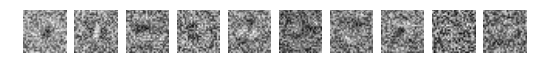

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
for i, w in enumerate(activations):
    plt.subplot(1, 10, i + 1)
    plt.set_cmap('gray')
    plt.axis('off')
    plt.imshow(w)
plt.gcf().set_size_inches(9, 9)

It's hard to see, but the images above do show certain noisy patterns: There's definitely region in the center and various edges that are darker or lighter than the background.

There's still a lot of noise, however, especially around the edges. This is because those bits just don't matter – so it doesn't matter what the weights there are. Our neural network just leaves them in their randomly initialized state.

This is a good reason to use **regularization**, which adds the weights to the cost. This reduces noisiness of your weights, and makes sure only the important ones are non-zero. Let's add regularization to our cost, weighted by a regularization factor $\lambda$:

In [33]:
reg_lambda = 0.01
regularized_cost = cost + reg_lambda * ((W * W).sum() + (b * b).sum())

And now let's train a regularized network:

In [34]:
# Compute the gradient of our error function
grad_W = grad(regularized_cost, W)
grad_b = grad(regularized_cost, b)

# Set up the updates we want to do
alpha = T.dscalar("alpha")
updates = [(W, W - alpha * grad_W),
           (b, b - alpha * grad_b)]

# Make our function. Have it return the cost!
train_regularized = function([x, labels, alpha],
                             regularized_cost,
                             updates=updates)

In [35]:
alpha = 10.0
labeled = encode_labels(train_set[1], 9)

costs = []
while True:
    costs.append(float(train_regularized(train_set[0], labeled, alpha)))
    
    if len(costs) % 10 == 0:
        print 'Epoch', len(costs), 'with cost', costs[-1], 'and alpha', alpha
    if len(costs) > 2 and costs[-2] - costs[-1] < 0.0001:
        if alpha < 0.2:
            break
        else:
            alpha = alpha / 1.5

Epoch 10 with cost 0.532439882538 and alpha 6.66666666667
Epoch 20 with cost 0.210066847758 and alpha 4.44444444444
Epoch 30 with cost 0.195590370257 and alpha 2.96296296296
Epoch 40 with cost 0.194275429693 and alpha 1.31687242798


Having retrained with regularization, let's take another look at our weight visualization:

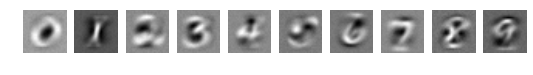

In [36]:
val_W = W.get_value()
activations = [val_W[i, :].reshape((28, 28)) for i in xrange(val_W.shape[0])]

for i, w in enumerate(activations):
    plt.subplot(1, 10, i + 1)
    plt.set_cmap('gray')
    plt.axis('off')
    plt.imshow(w)
plt.gcf().set_size_inches(9, 9)

Wow! We can *very* clearly see the effect of regularization – it's completely eliminated all the noise in our network, yielding almost crisp images. Places that are white are highly positive, places that are gray are close to zero, and places that are black are highly negative. It's very clear what this network is looking for on each of its outputs!

How well does it do?

In [37]:
prediction = compute_prediction(test_set[0])
accuracy(prediction, test_set[1])

0.8572

Although the weight visualizations look good, it doesn't do nearly as well as the old network. This is probably because we've *underfit* our training data. By using a high regularization, we've forced the network to discard things it learned in favor of lower weights, which decreased the effectiveness. (It's also possible to *overfit*, where not using enough regularization yields a network that's highly specific to the input data. Finding the right regularization is tricky, and you can use cross-validation to do it.)

**Note:** In the above tests, we used the test set both times. If we were developing a new algorithm, this would not be okay: the test set should be used *only* when reporting final results. You should not look at the test set accuracy while developing the algorithm, as then it becomes just part of the training set.

# Neural Network with Hidden Layers

Above, we implemented a logistic regression – effectively a neural network with no hidden layers. Let's add a hidden layer and see if we can do better. The code is almost exactly the same, but will just involve a second weight matrix and bias vector.

In [38]:
# Initialize shared weight variables
W1_shape = (50, 784)
b1_shape = 50
W2_shape = (10, 50)
b2_shape = 10

W1 = shared(np.random.random(W1_shape) - 0.5, name="W1")
b1 = shared(np.random.random(b1_shape) - 0.5, name="b1")
W2 = shared(np.random.random(W2_shape) - 0.5, name="W2")
b2 = shared(np.random.random(b2_shape) - 0.5, name="b2")

# Symbolic inputs
x = T.dmatrix("x") # N x 784
labels = T.dmatrix("labels") # N x 10

# Symbolic outputs
hidden = T.nnet.sigmoid(x.dot(W1.transpose()) + b1)
output = T.nnet.softmax(hidden.dot(W2.transpose()) + b2)
prediction = T.argmax(output, axis=1)
reg_lambda = 0.0001
regularization = reg_lambda * ((W1 * W1).sum() + (W2 * W2).sum() + (b1 * b1).sum() + (b2 * b2).sum())
cost = T.nnet.binary_crossentropy(output, labels).mean() + regularization

# Output functions
compute_prediction = function([x], prediction)

# Training functions
alpha = T.dscalar("alpha")
weights = [W1, W2, b1, b2]
updates = [(w, w - alpha * grad(cost, w)) for w in weights]
train_nn = function([x, labels, alpha],
                 cost,
                 updates=updates)

Let's train our network, just like we did before:

In [39]:
alpha = 10.0
labeled = encode_labels(train_set[1], 9)

costs = []
while True:
    costs.append(float(train_nn(train_set[0], labeled, alpha)))

    if len(costs) % 10 == 0:
        print 'Epoch', len(costs), 'with cost', costs[-1], 'and alpha', alpha
    if len(costs) > 2 and costs[-2] - costs[-1] < 0.0001:
        if alpha < 0.2:
            break
        else:
            alpha = alpha / 1.5

Epoch 10 with cost 0.542872987885 and alpha 10.0
Epoch 20 with cost 0.464100429428 and alpha 10.0
Epoch 30 with cost 0.421992067969 and alpha 10.0
Epoch 40 with cost 0.393985522994 and alpha 10.0
Epoch 50 with cost 0.372628179502 and alpha 10.0
Epoch 60 with cost 0.355068649039 and alpha 10.0
Epoch 70 with cost 0.339943119541 and alpha 10.0
Epoch 80 with cost 0.326454512507 and alpha 10.0
Epoch 90 with cost 0.314186499023 and alpha 10.0
Epoch 100 with cost 0.302907377454 and alpha 10.0
Epoch 110 with cost 0.292426176548 and alpha 10.0
Epoch 120 with cost 0.28261061289 and alpha 10.0
Epoch 130 with cost 0.27336930265 and alpha 10.0
Epoch 140 with cost 0.264634479066 and alpha 10.0
Epoch 150 with cost 0.25635403274 and alpha 10.0
Epoch 160 with cost 0.248486730607 and alpha 10.0
Epoch 170 with cost 0.240999040689 and alpha 10.0
Epoch 180 with cost 0.233863007626 and alpha 10.0
Epoch 190 with cost 0.227054816574 and alpha 10.0
Epoch 200 with cost 0.22055380389 and alpha 10.0
Epoch 210 wit

In [40]:
prediction = compute_prediction(test_set[0])
accuracy(prediction, test_set[1])

0.9352

When I run this, I get an improvement to around 93-94% correctness! Although this is only a few percent, this reduces the error rate dramatically. Note that proper regularization is *crucial* here. In my experiments, overregularizing caused accuracies of only 50%, not regularizing at all yielded accuracies of around 91%, and doing a good regularization can get between 93 and 95 percent. Regularization is important and tricky!

Let's look at the weights our network is learning. We can really only look at the hidden layer, since the next layers don't have the same image interpretation:

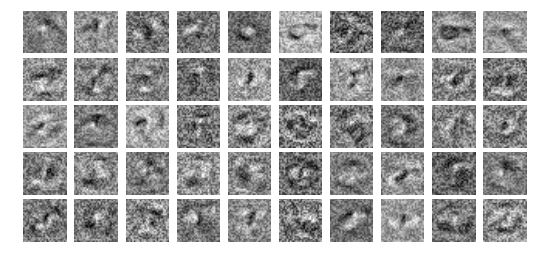

In [41]:
val_W1 = W1.get_value()
activations = [val_W1[i, :].reshape((28, 28)) for i in xrange(val_W1.shape[0])]

for i, w in enumerate(activations):
    plt.subplot(5, 10, i + 1)
    plt.set_cmap('gray')
    plt.axis('off')
    plt.imshow(w)
plt.subplots_adjust(hspace=-0.85)
plt.gcf().set_size_inches(9, 9)

We can see that these weights are all varieties on weak edge, circle, and so on detectors. Our regularization was not nearly as strong as it was before, so there's still a little bit of noise – this is okay!

Although visualizing other weights is hard, we can still look at their distribution on a histogram to give us an idea of what range they are in:

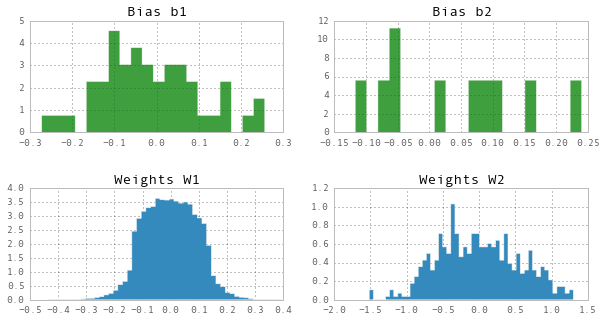

In [42]:
# Plot biases
plt.subplot(2, 2, 1)
n, bins, patches = plt.hist(b1.get_value(), 20, normed=1, histtype='stepfilled')
plt.title('Bias b1')
plt.setp(patches, 'facecolor', 'g', 'alpha', 0.75);

plt.subplot(2, 2, 2)
n, bins, patches = plt.hist(b2.get_value(), 20, normed=1, histtype='stepfilled')
plt.title('Bias b2')
plt.setp(patches, 'facecolor', 'g', 'alpha', 0.75);

# Plot weights
plt.subplot(2, 2, 3)
n, bins, patches = plt.hist(W1.get_value().flatten(), 50, normed=1, histtype='stepfilled')
plt.title('Weights W1')

plt.subplot(2, 2, 4)
n, bins, patches = plt.hist(W2.get_value().flatten(), 50, normed=1, histtype='stepfilled')
plt.title('Weights W2')

plt.gcf().set_size_inches(10, 5)

We can also visualizing the training costs over time, allowing us to see the gradual decrease in the objective function:

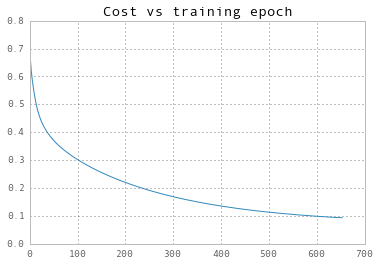

In [43]:
plt.plot(range(len(costs)), costs)
plt.title('Cost vs training epoch')

The exponential-looking curve is very common for training cost; it starts out dropping drastically, and then peters out as it converges.

## Further Exercises

That's it for now! We've implemented a neural network with no hidden layers and with one hidden layers, trained both of them, evaluated their accuracy and took a glimpse at their weights.

There are many places to go from to learn more about neural networks. Below are a few suggestions:

- Implement a convolutional network using Theano's [convolution operators](http://deeplearning.net/software/theano/library/tensor/nnet/conv.html).
- Implement deeper neural networks, first with 2 or 3 hidden layers, and then with 6 or 7. See if you can find evidence of either exploding or [vanishing gradients](http://neuralnetworksanddeeplearning.com/chap5.html#the_vanishing_gradient_problem).
- Train your networks on a GPU by adjusting the [Theano settings](http://deeplearning.net/software/theano/tutorial/using_gpu.html).
- So far, we've trained on our entire data set at once. Change this to use [stochastic minibatch gradient descent](http://en.wikipedia.org/wiki/Stochastic_gradient_descent) instead.
- Implement a first order heuristic training method such as [RPROP](https://en.wikipedia.org/wiki/Rprop) or a second order method such as [nonlinear conjugate gradient](http://en.wikipedia.org/wiki/Nonlinear_conjugate_gradient_method). Do they help? (I suspect that RPROP will help somewhat, and NCG may not help. I'm not sure, though!)
- Use [theano-hf](https://github.com/boulanni/theano-hf) to train a network using Hessian-free optimization.